[0.99773035 1.00033678 0.99987527 ... 0.99992646 1.00062167 0.99955397] electron / s
<class 'lightkurve.lightcurve.FoldedLightCurve'> <class 'lightkurve.targetpixelfile.KeplerTargetPixelFile'>


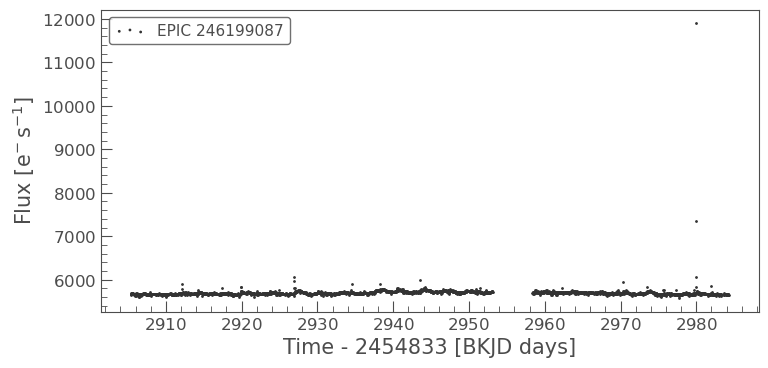

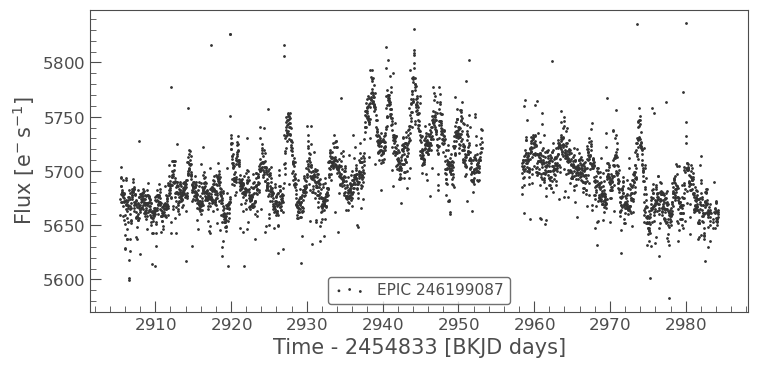

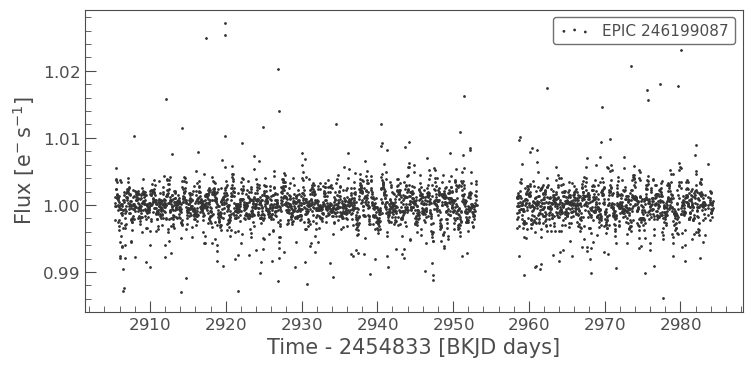

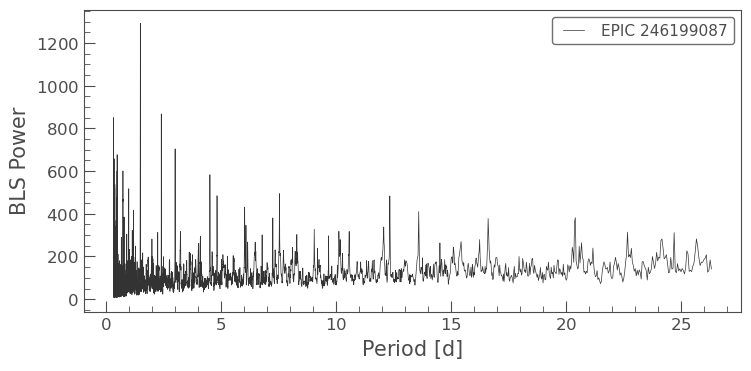

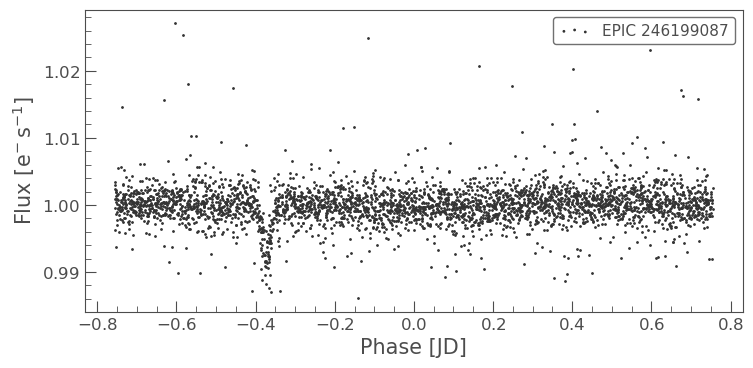

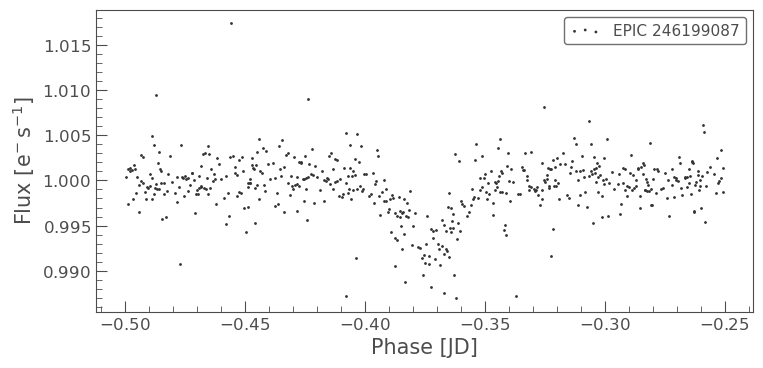

In [1]:
import lightkurve as lk
import pandas as pd

pixelfile = lk.search_targetpixelfile("Trappist-1")[1].download()
lc = pixelfile.to_lightcurve(method="pld")
lc.scatter()
lc = lc.remove_outliers()
lc.scatter()
lc = lc.flatten() #normalized
lc.scatter()
lc.to_periodogram("bls").plot()

print(lc.flux)
period = lc.to_periodogram("bls").period_at_max_power
lc = lc.fold(period)
lc.scatter()
lc.truncate(-.5,-.25).scatter()

print(type(lc), type(pixelfile))

In [2]:
print(lc.flux)
temp = (lc.flux).value-1
pd.DataFrame(temp).describe()
#subtract 1 from all the flux values, descibe and plot it
#compare to image #2 on the right & compare y axis


[0.99959147 1.00087324 1.00342588 ... 0.99842317 1.00252014 0.99932729] electron / s


,0
count,3346.000000
mean,0.000014
std,0.002921
min,-0.013842
25%,-0.001339
50%,0.000014
75%,0.001401
max,0.027073


In [3]:
print(lc.time)

[-0.75531253 -0.75510569 -0.75504713 ...  0.75412126  0.75482574
  0.75502573]


In [4]:
import numpy as np
pog = lc.to_pandas()
print(pog["flux"])

with open('Models/lk.npy', 'wb') as f:
    np.save(f, pog["flux"])

time
-0.755313    0.999591
-0.755106    1.000873
-0.755047    1.003426
-0.754414    1.002334
-0.754198    1.003013
               ...   
 0.753025    1.000718
 0.753926    1.000692
 0.754121    0.998423
 0.754826    1.002520
 0.755026    0.999327
Name: flux, Length: 3346, dtype: float64
